In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from read_in_census_data import CensusInfo, DataFrameWrapper
from collections import Counter
# imports done

In [2]:
# All def
# Combining education together
#education function is converting education into ranges. SO it can be displayed on graph and compared with income.
def education(x):
    if 9 <= x <= 11:
        return 'HS'
    elif x == 12:
        return 'AA'
    elif x == 13:
        return 'BE'
    elif x == 14:
        return 'MS' #masters
    elif x > 14:
        return 'HD' #Doctor or professional
    else:
        return 'ND'

# combinig enducation together ends

# all def ends

In [3]:
#Here I have created lists of state and text files corresponting to state. I have done this for automation 
#and one point change if I have to change or add any state in future
data_dictionary = '5%_PUMS_record_layout.xls'
ci_states = CensusInfo(data_dictionary)
states=['alabama','texas','california','florida','illnois','virginia','ohio','alaska','new_york','district_of_colombia']
textFiles=['revisedpums1_alabama_01','revisedpums1_48','revisedpums1_06','revisedpums1_12','revisedpums1_17','revisedpums1_51','revisedpums1_39','revisedpums1_02','revisedpums1_36','revisedpums1_11']
df = DataFrameWrapper(ci_states)
df.is_copy = False

Processing 'Housing Unit Record' Sheet

Processing 'Person Record' Sheet



In [4]:
# Creating CSV looping 10 states then commenting out the code
#This code is commented because it will keep on overriting old csv.
#I have deleted Text files after creating CSV because they were too heavy, 80-90 MB files.
# textFilesCounter=0
# for loopingState in states:
#     one_percent = 'states/'+loopingState+'/'+textFiles[textFilesCounter]+'.txt'
#     df.fill_frame ([], ci_states.person_record, one_percent, ci_states.one_percent_file,'race','education','income','gender','age','relationship')
#     df.save_frame('states/'+loopingState+'/'+textFiles[textFilesCounter]+'_extract.csv',header=True)
#     textFilesCounter+=1
# Creating Csv ends here...!



{'new_york': 34981.0, 'florida': 30028.93, 'virginia': 33246.23, 'alaska': 30830.28, 'california': 34935.23, 'district_of_colombia': 37552.77, 'ohio': 29824.59, 'alabama': 26981.05, 'texas': 29945.09, 'illnois': 32660.88}


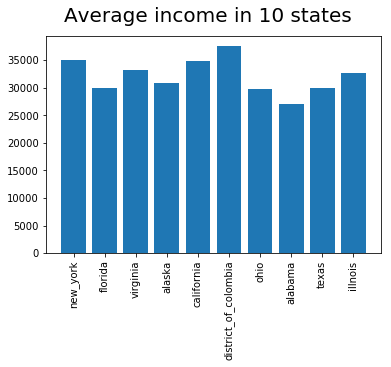

In [5]:
# Average Incomes in 10 states
dt_dict ={'serial_no':object,'race':object,'gender':object,'relationship':object}
avgIncomeDict={}
stateDict={}
educationDict={}
# Lets store states objects to variable.
p_df_alabama = pd.read_csv('states/'+states[0]+'/'+textFiles[0]+'_extract.csv',dtype=dt_dict)
p_df_texas = pd.read_csv('states/'+states[1]+'/'+textFiles[1]+'_extract.csv',dtype=dt_dict)
p_df_california = pd.read_csv('states/'+states[2]+'/'+textFiles[2]+'_extract.csv',dtype=dt_dict)
p_df_florida = pd.read_csv('states/'+states[3]+'/'+textFiles[3]+'_extract.csv',dtype=dt_dict)
p_df_illnois = pd.read_csv('states/'+states[4]+'/'+textFiles[4]+'_extract.csv',dtype=dt_dict)
p_df_virginia = pd.read_csv('states/'+states[5]+'/'+textFiles[5]+'_extract.csv',dtype=dt_dict)
p_df_ohio = pd.read_csv('states/'+states[6]+'/'+textFiles[6]+'_extract.csv',dtype=dt_dict)
p_df_alaska = pd.read_csv('states/'+states[7]+'/'+textFiles[7]+'_extract.csv',dtype=dt_dict)
p_df_new_york = pd.read_csv('states/'+states[8]+'/'+textFiles[8]+'_extract.csv',dtype=dt_dict)
p_df_district_of_colombia = pd.read_csv('states/'+states[9]+'/'+textFiles[9]+'_extract.csv',dtype=dt_dict)
stateDict={'alabama':p_df_alabama,'texas':p_df_texas,'california':p_df_california,'florida':p_df_florida,'illnois':p_df_illnois,'virginia':p_df_virginia,\
           'ohio':p_df_ohio,'alaska':p_df_alaska,'new_york':p_df_new_york,'district_of_colombia':p_df_district_of_colombia}

for loopingState in states:
    incomeOf=stateDict[loopingState]
    stateIncomeIs=incomeOf[incomeOf['income']>0]['income']
    mean=round(stateIncomeIs.mean(),2)
    avgIncomeDict[loopingState]=mean
print avgIncomeDict

plt.suptitle('Average income in 10 states', fontsize=20)
plt.bar(range(len(avgIncomeDict)), avgIncomeDict.values(), align='center')
plt.xticks(range(len(avgIncomeDict)), avgIncomeDict.keys(),rotation=90)
plt.show()
# Average income ends

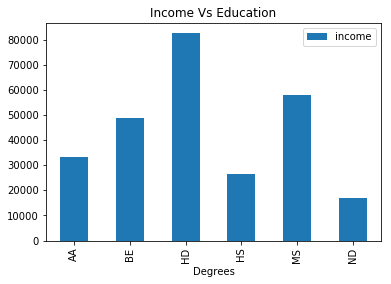

In [6]:
#Education degree VS Income of 10 states
for loopingState in states:
    incomeOf=stateDict[loopingState]
    stateIncomeIs=incomeOf[incomeOf['income']>0]['income']
    mean=round(stateIncomeIs.mean(),2)
    avgIncomeDict[loopingState]=mean
#Lets compare mean income and max education of multiple groups overall in 10 states
#logic- get numbers of education and its corresponding income for every state then average it
p_df_inc2 = pd.DataFrame()
for loopingState in states:
    stateName=stateDict[loopingState]
    p_df_inc = stateName[stateName['income']>0]
    p_df_inc.is_copy=None
    # print p_df_inc['education'].map(education)
    p_df_inc.loc[:,'Degrees']=p_df_inc['education'].map(education)
    # print p_df_district_of_colombia
    dataFrame=p_df_inc.loc[:,['Degrees','income']]
    p_df_inc2=p_df_inc2.append(dataFrame,ignore_index=True)
# has all degrees and income of ten states

plt.show(p_df_inc2.groupby('Degrees').mean().plot(y='income', kind='bar',title='Income Vs Education'))
#income and max education of multiple groups overall in 10 states ends


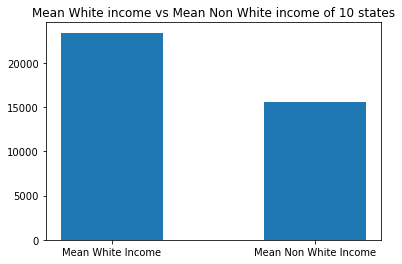

In [7]:
#whites n non white only income in 10 states
whiteIncome=[]
nonWhiteIncome=[]
for loopingState in states:
    stateName = stateDict[loopingState]
    stateName['white_only'] = stateName['race'].map(lambda x: x == '47')
    income=stateName['income'].groupby(stateName['white_only']).mean()
    whiteIncome.append(income[True])
    nonWhiteIncome.append(income[False])
meanWhiteIncome=round(np.mean(whiteIncome),2)
meanNonWhiteIncome=round(np.mean(nonWhiteIncome),2)
fig, ax  = plt.subplots()
ax.set_title('Mean White income vs Mean Non White income of 10 states')
ax.bar([1,2], [meanWhiteIncome,meanNonWhiteIncome,], align='center', width=0.5,
       tick_label=['Mean White Income', 'Mean Non White Income'])
plt.show()
#whites n non white only income ends

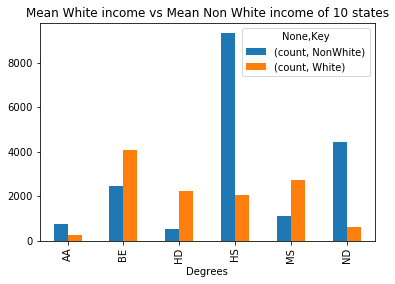

In [8]:
#whites max education vs non whites max education
# All white population vs all non white population

p_df_inc3 = pd.DataFrame()
whiteOnlyDF=pd.DataFrame()
nonWhiteOnlyDF=pd.DataFrame()
for loopingState in states:
    stateName=stateDict[loopingState]
    p_df_inc.loc[:, 'Degrees'] = p_df_inc['education'].map(education)
    dataFrame=p_df_inc.loc[:,['Degrees','race']]
    p_df_inc3=p_df_inc3.append(dataFrame,ignore_index=True)

whiteOnlyDF=p_df_inc3[p_df_inc3['race'].map(lambda x: x == '47')]
nonWhiteOnlyDF=p_df_inc3[p_df_inc3['race'].map(lambda x: x != '47')]
# groupby('Degrees').count()
df1 = whiteOnlyDF['Degrees'].value_counts()
df2 = nonWhiteOnlyDF['Degrees'].value_counts()
df1 = pd.DataFrame({'Degrees':df1.index, 'count':df1.values})
df2 = pd.DataFrame({'Degrees':df2.index, 'count':df2.values})
df1['Key'] = 'White'
df2['Key'] = 'NonWhite'

DF = pd.concat([df1,df2],keys=['White','NonWhite'])

DFGroup = DF.groupby(['Degrees','Key'])
DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')
DFGPlot.set_title('Mean White income vs Mean Non White income of 10 states')
plt.show()
# print nonWhiteOnlyDF

In [9]:
#please uncomment the below line to install plotly on your machine. Created USA map from plotly
# !pip install plotly
import plotly
import plotly.plotly as py
import csv
plotly.tools.set_credentials_file(username='akadadi', api_key='PF8WcSYS3wVE6XKbPz8g')

In [10]:
# Creating CSV for map.
textFilesCounter=0
codeFile=['AL','TX','CA','FL','IL','VA','OH','AK','NY','DC'] #states code
counter=0
with open("map.csv",'wb') as f:
    writer1 = csv.DictWriter(f,fieldnames = ["code", "state", "income","age","race"])
    writer = csv.writer(f, dialect='excel')
    writer1.writeheader()
    for loopingState in states:
        stateName = stateDict[loopingState]
        stateIncomeIs=stateName[stateName['income']>0]['income']
        meanIncome=round(stateIncomeIs.mean(),2)
        age=stateName[stateName['age']>0]['age']
        meanAge=round(age.mean(),2)
        race=stateName[stateName['race']>0]['race'].value_counts().idxmax()
        code=codeFile[counter]
        csvwrite=[code,loopingState,meanIncome,meanAge,race]
        writer.writerow(csvwrite)
        counter+=1
# Creating Csv ends here...!


In [11]:
#mapping race number to name for displaying in MAP
reader = csv.reader(open('race.csv'))
raceNameDict = {}
for row in reader:
    key = row[0]
    raceNameDict[key] = row[1]
# print raceNameDict

In [12]:
p_df_inc4 = pd.read_csv('map.csv')
for col in p_df_inc4.columns:
    p_df_inc4[col] = p_df_inc4[col].astype(str)
#     print p_df_inc4[col]
#     p_df_inc4['state']=loopingState
# for col in df.columns:
#     df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(255, 204, 204)'],[0.2, 'rgb(255, 153, 153)'],[0.4, 'rgb(255, 77, 77)'],\
            [0.6, 'rgb(255, 26, 26)'],[0.8, 'rgb(204, 0, 0)'],[1.0, 'rgb(77, 0, 0)']]
counter=0
for _ in " "*10:
    
    raceNumber=p_df_inc4['race'][counter]
    p_df_inc4['race'][counter]=raceNameDict[raceNumber]
    counter+=1
    
p_df_inc4['text'] = p_df_inc4['state'] + '<br>' +\
    'Highest Race :\''+ p_df_inc4['race'] +'\''+'<br>'' Mean Age :'+ p_df_inc4['age']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = p_df_inc4['code'],
        z = p_df_inc4['income'].astype(float),
        locationmode = 'USA-states',
        text = p_df_inc4['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = 'YEAR 2000 USA Highest Income states, Mean Age and Most Occuring race<br>(Hover for breakdown).<br> Zoom near VIRGINIA for DC :)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='Income Map' )

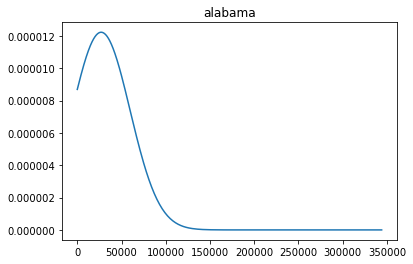

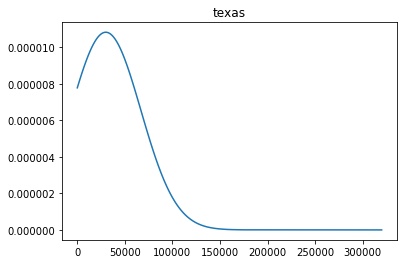

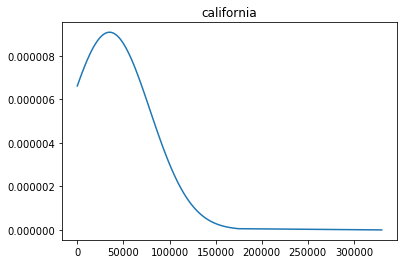

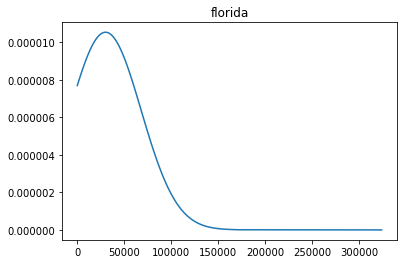

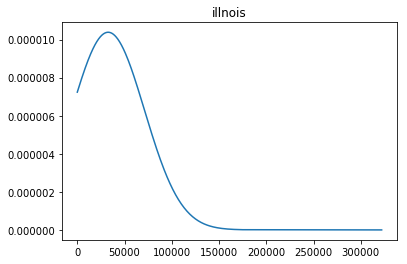

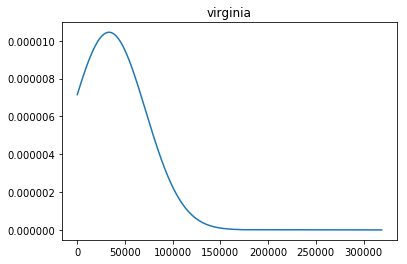

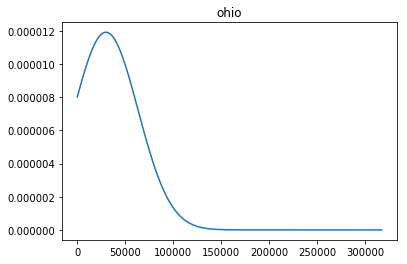

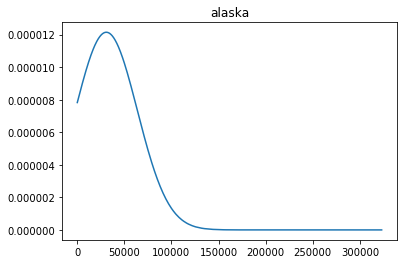

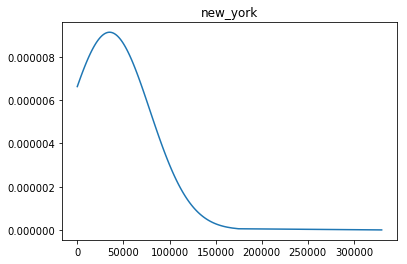

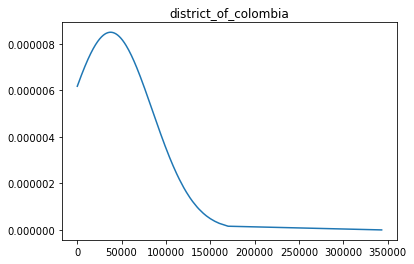

In [13]:
#Distribution of Income in 10 states. Notmal distribution. We can see Income is skewed.
import scipy.stats as stats
allIncomeDict=[]
for loopingState in states:
    incomeOf=stateDict[loopingState]
    stateIncomeIs=incomeOf[incomeOf['income']>0]['income']
#     mean=round(stateIncomeIs.mean(),2)
#     allIncomeDict[loopingState]=[stateIncomeIs]
    allIncomeDict=stateIncomeIs.values.tolist()
    h = allIncomeDict
    h.sort()
    hmean = np.mean(h)
    hstd = np.std(h)
    pdf = stats.norm.pdf(h, hmean, hstd)
    plt.plot(h, pdf) 
    plt.title(loopingState)
    plt.show()